## Clean the dataset

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import networkx as nx
from statsmodels.formula.api import ols



In [3]:
df = pd.read_csv('row data.csv')

### Data Processing

- Change the scales into numerical dataset
    Measurements   | Number
    -------------  | -------------
    Strongly agree  | 5
    Somewhat agree  | 4
    Neither agree nor disagree | 3
    Somewhat diagree | 2
    Strongly disagree | 1

    Measurements   | Number
    -------------  | -------------
    Extremely difficult  | 1
    Somewhat difficult  | 2
    Neither easy nor difficult | 3
    Somewhat easy | 4
    Extremely easy | 5
    

In [5]:
df['The following questions regard Climate Change. \nTo what extent do you agree or disagree that we have plenty of time to deal with Climate Change?'].unique()

array(['Strongly agree', 'Somewhat disagree', 'Somewhat agree',
       'Neither agree nor disagree', 'Strongly disagree'], dtype=object)

In [6]:
# Threat related questions - 1: disagree = less severe; 5: strong agree = extreme severe
df = df.replace('Strongly agree', 5)

df = df.replace('Somewhat agree', 4)
df = df.replace('Agree', 4)

df = df.replace('Neither agree nor disagree', 3)
df = df.replace('Undecided', 3)

df = df.replace('Somewhat disagree', 2)
df = df.replace('Disagree', 2)

df = df.replace('Strongly disagree', 1)

# Imagine (tangibility) questions - 1: less tangible; 5: very tangible 
df = df.replace('Extremely difficult', 1)
df = df.replace('Somewhat difficult', 2)
df = df.replace('Neither easy nor difficult', 3)
df = df.replace('Somewhat easy', 4)
df = df.replace('Extremely easy', 5)

# How likely do you think you are to get COVID-19? - 1: less severe; 5: extreme severe
df = df.replace('Extremely likely', 5)
df = df.replace('Somewhat likely', 4)
df = df.replace('Neither likely nor unlikely', 3)
df = df.replace('Somewhat unlikely', 2)
df = df.replace('Extremely unlikely', 1)

# How severe do you expect the symptoms would be if you were to get COVID-19? - 1: less severe; 5: extreme severe
df = df.replace('Extremely mild or no symptoms', 1)
df = df.replace('Mild (similar to a cold)', 2)
df = df.replace('Potentially fatal', 3)
df = df.replace('Severe (similar to the flu, unable to go about your day normally)', 4)
df = df.replace('Extremely severe (potential hospitalization)', 5)

# Have you previously tested positive for COVID-19? - 1: Yes, 0: No
df = df.replace('Yes', 1)
df = df.replace('No', 0)

# How frequently do you feel fear related to COVID-19? - 1: less frequent( less severe); 5: most frequent (most severe)
df = df.replace('Never', 1)
df = df.replace('Once a week', 2)
df = df.replace('2-3 times a week', 3)
df = df.replace('4-6 times a week', 4)
df = df.replace('Frequently throughout the day, or once a day', 5)

# When you feel fear about COVID-19 how intense is it?: 1 - dont feel(less severe); 5 - very intense (most severe)
df = df.replace("I don't feel fear related to COVID-19", 1)
df = df.replace('Not intense', 2)
df = df.replace('Somewhat intense', 3)
df = df.replace('Moderately intense', 4)
df = df.replace('Very Intense', 5)


# add id
df["ID"] = range(1, len(df) + 1)


In [7]:
# General Statistical Information

### Demographic Information

In [9]:
## total number
num_rows = df.shape[0]
print(f'the total row number of the pts is {num_rows}')

the total row number of the pts is 302


#### Gender

In [11]:
## Gender
gender = df["What is your gender? - Selected Choice"]
# print(f"the choices of the gender are {gender.unique()}")

In [12]:
gender = df["What is your gender? - Selected Choice"]
male = (gender == 'Male').sum()
female = (gender == 'Female').sum()
nonbinary = (gender == 'Nonbinary').sum()
genderelse = (~gender.isin(['Male', 'Female', 'Nonbinary'])).sum()

print(f'the number of male is {male},\nthe number of famle is {female},\nthe number of nonbinary population is {nonbinary},\nthe number of others is {genderelse}')

the number of male is 142,
the number of famle is 157,
the number of nonbinary population is 1,
the number of others is 2


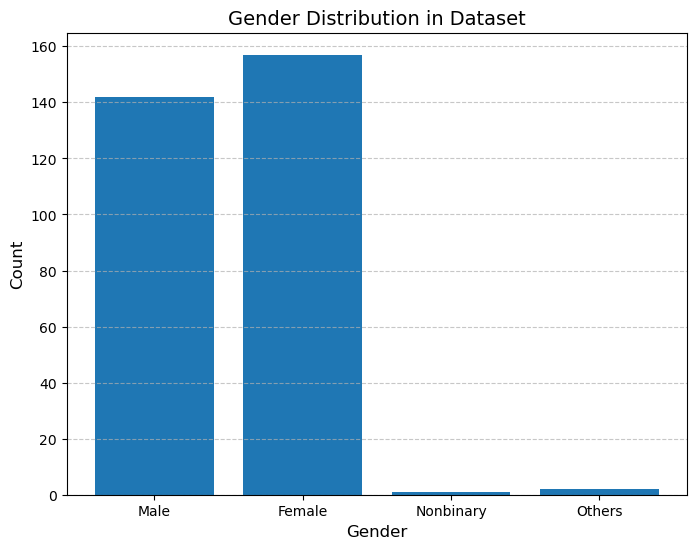

In [13]:
# Data for the bar chart
categories = ['Male', 'Female', 'Nonbinary', 'Others']
values = [male, female, nonbinary, genderelse]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values)
plt.title("Gender Distribution in Dataset", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Age

In [15]:
# Ensuring the remaining values in "What is your age?" are numeric
age = pd.to_numeric(df["What is your age?"], errors='coerce').dropna().astype(int)
age = age[age != 75001]

In [16]:
stats = {
        "Count": age.count(),
        "Mean": round(age.mean(), 2),
        "Median": round(age.median(), 2),
        "Standard Deviation": round(age.std(), 2),
        "Minimum": round(age.min(), 2),
        "Maximum": round(age.max(), 2)
    }
stats

{'Count': 298,
 'Mean': 39.83,
 'Median': 38.5,
 'Standard Deviation': 17.05,
 'Minimum': 18,
 'Maximum': 79}

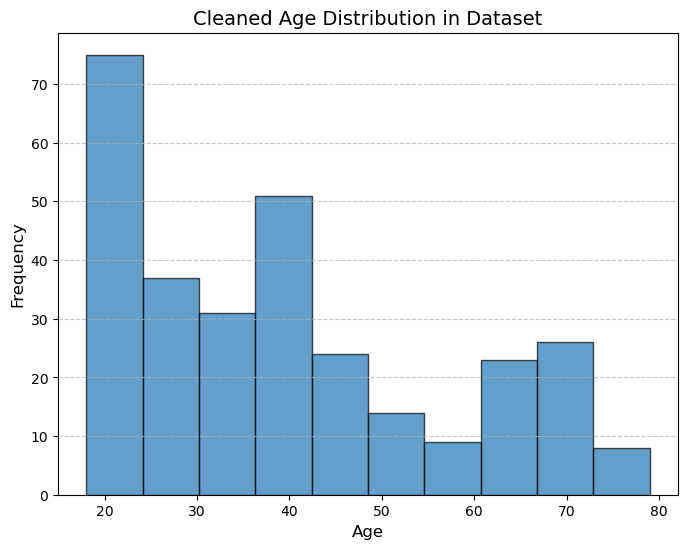

In [17]:

# Plotting the cleaned age distribution as a histogram
plt.figure(figsize=(8, 6))
plt.hist(age, bins=10, edgecolor='black', alpha=0.7)
plt.title("Cleaned Age Distribution in Dataset", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
# df_employ = df['What is your current employment status? Select multiple ONLY if you worked multiple jobs before the spread of COVID-19 and the jobs have been impacted differently.']
#df_employ.unique()


In [19]:
#df.columns

### Income
- income level:
    - 0: $0
    
    - 1: $1 - $9,999
    
    - 2: $10,000 - 24,999
    
    - 3: $25,000 - $49,999
    
    - 4: $50,000 - $74,999
    
    - 5: $75,000- $99,999
    
    - 6: $100,000 - $149,999
    
    - 7: $150,000 and greater

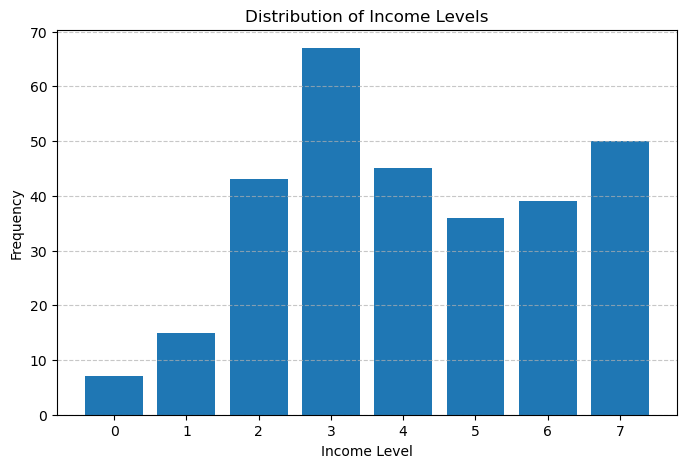

In [21]:
df_income = df['Information about income is very important to understand.  Would you please give your best guess?Please indicate the answer that includes your entire household income in (previous year) before taxes.']
df_income.unique()

# Mapping dictionary
income_mapping = {
    '$0': 0,
    '$1 - $9,999': 1,
    '$10,000 - 24,999': 2,
    '$25,000 - $49,999': 3,
    '$50,000 - $74,999': 4,
    '$75,000- $99,999': 5,
    '$100,000 - $149,999': 6,
    '$150,000 and greater': 7
}

# Use replace to transform income ranges into levels
df_income = df_income.replace(income_mapping)

# Count frequency of each income level
income_counts = df_income.value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(8,5))
plt.bar(income_counts.index, income_counts.values, tick_label=income_counts.index)
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.title('Distribution of Income Levels')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
income_percentage = df_income.value_counts(normalize=True) * 100

# Create a summary DataFrame
df_income_stats = pd.DataFrame({
    'Count': income_counts,
    'Percentage': round(income_percentage,2)
})
df_income_stats

,Count,Percentage
0,7,2.32
1,15,4.97
2,43,14.24
3,67,22.19
4,45,14.90
5,36,11.92
6,39,12.91
7,50,16.56


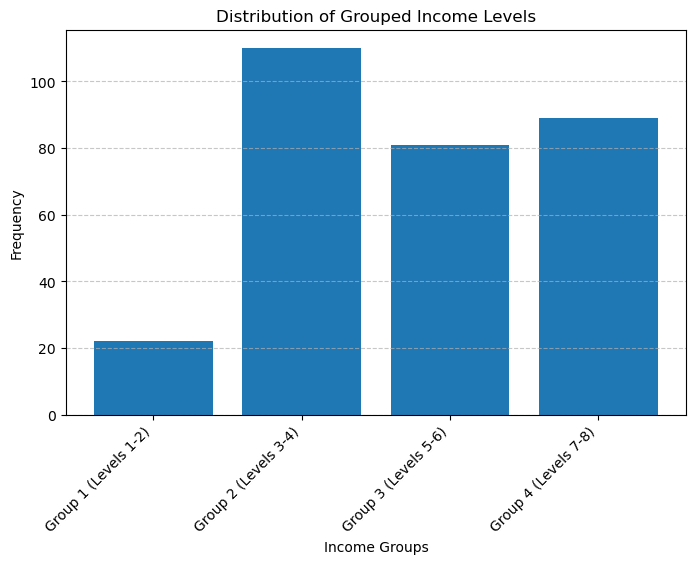

In [23]:
# Define grouping dictionary
income_grouping = {
    0: 'Group 1 (Levels 1-2)',
    1: 'Group 1 (Levels 1-2)',
    2: 'Group 2 (Levels 3-4)',
    3: 'Group 2 (Levels 3-4)',
    4: 'Group 3 (Levels 5-6)',
    5: 'Group 3 (Levels 5-6)',
    6: 'Group 4 (Levels 7-8)',
    7: 'Group 4 (Levels 7-8)'
}

# Replace income levels with grouped categories
df_income['income_group'] = df_income.replace(income_grouping)

# Count frequency of each income group
income_group_counts = df_income['income_group'].value_counts().sort_index()

# Plot histogram for grouped income levels
plt.figure(figsize=(8,5))
plt.bar(income_group_counts.index, income_group_counts.values)
plt.xlabel('Income Groups')
plt.ylabel('Frequency')
plt.title('Distribution of Grouped Income Levels')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:

income_group_percentage = df_income['income_group'].value_counts(normalize=True) * 100

# Create a summary DataFrame
df_income_group_stats = pd.DataFrame({
    'Count': income_group_counts,
    'Percentage': round(income_group_percentage,2)
})
df_income_group_stats

,Count,Percentage
Group 1 (Levels 1-2),22,7.28
Group 2 (Levels 3-4),110,36.42
Group 3 (Levels 5-6),81,26.82
Group 4 (Levels 7-8),89,29.47


### Race

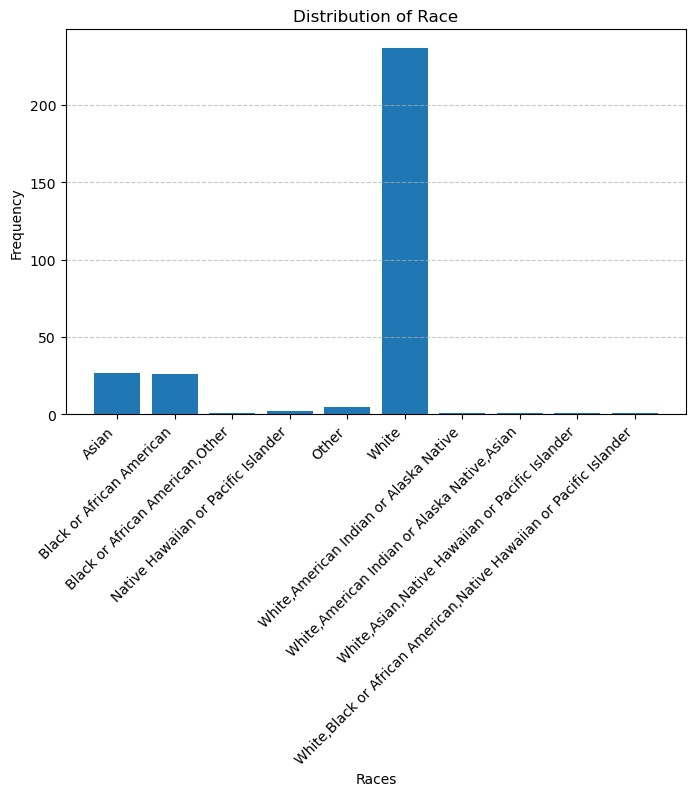

In [26]:
df_race = df['Please select the race you most identify with: (check all that apply) - Selected Choice']
df_race.unique()

# Count frequency of each income group
race_counts = df_race.value_counts().sort_index()

# Plot histogram for grouped income levels
plt.figure(figsize=(8,5))
plt.bar(race_counts.index, race_counts.values)
plt.xlabel('Races')
plt.ylabel('Frequency')
plt.title('Distribution of Race')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [27]:
race_counts

Asian                                                                   27
Black or African American                                               26
Black or African American,Other                                          1
Native Hawaiian or Pacific Islander                                      2
Other                                                                    5
White                                                                  237
White,American Indian or Alaska Native                                   1
White,American Indian or Alaska Native,Asian                             1
White,Asian,Native Hawaiian or Pacific Islander                          1
White,Black or African American,Native Hawaiian or Pacific Islander      1
Name: Please select the race you most identify with: (check all that apply) - Selected Choice, dtype: int64

### Political Affiliation

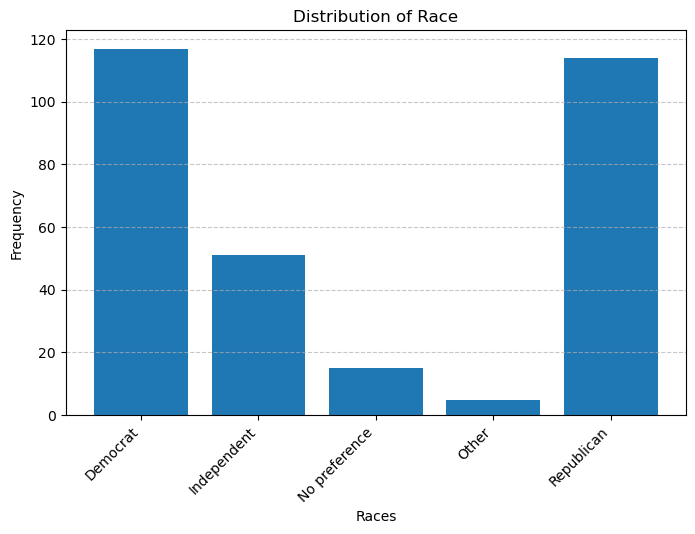

In [29]:
df_poli = df['Generally speaking, do you usually think of yourself as a Republican, a Democrat, an Independent, or something else? - Selected Choice']
df_poli.unique()
# Count frequency of each income group
poli_counts = df_poli.value_counts().sort_index()

# Plot histogram for grouped income levels
plt.figure(figsize=(8,5))
plt.bar(poli_counts.index, poli_counts.values)
plt.xlabel('Races')
plt.ylabel('Frequency')
plt.title('Distribution of Race')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [30]:
# General statistical analysis
poli_counts = df_poli.value_counts()
poli_percentage = df_poli.value_counts(normalize=True) * 100

# Create a summary DataFrame
df_poli_stats = pd.DataFrame({
    'Count': poli_counts,
    'Percentage': round(poli_percentage,2)
})
df_poli_stats

,Count,Percentage
Democrat,117,38.74
Republican,114,37.75
Independent,51,16.89
No preference,15,4.97
Other,5,1.66


### Generate a demographic table

- Regression Analysis
- Mediation
- Moderation

In [32]:
## Clean data

# Reverse the values in the specified column
column_covid = "The following questions regard COVID-19. \nTo what extent do you agree or disagree that we have plenty of time to deal with COVID-19?"
column_climate = 'The following questions regard Climate Change. \nTo what extent do you agree or disagree that we have plenty of time to deal with Climate Change?'
# Strong agree (5->1):less severel Strongly disgree (1->5): very severe 
# Define a mapping for reversing the scale
reverse_mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

# Apply the mapping to reverse the values
df[column_covid] = df[column_covid].map(reverse_mapping)
df[column_climate] = df[column_climate].map(reverse_mapping)


In [33]:
# Define category groupings based on provided dataset structure
covid_category_columns = {
    "Covid Threat Imminence": [
        # "The following questions regard COVID-19. \nTo what extent do you agree or disagree that we have plenty of time to deal with COVID-19?",
        "To what extent do you agree or disagree that COVID is an imminent threat?"
    ],
    "Covid Tangibility": [
        "Fill in the following sentence: When I think of COVID-19, it is _____ for me to imagine it.",
        "When I think of COVID-19 it is a very concrete concept."
    ],
    "Covid Threat Perception": [
        "How much do you agree or disagree with the following statements? - The COVID-19 pandemic is a threat to me",
        "How much do you agree or disagree with the following statements? - The COVID-19 pandemic is a threat to my loved ones",
        "How much do you agree or disagree with the following statements? - The COVID-19 pandemic is a threat to the economy",
        "How much do you agree or disagree with the following statements? - The COVID-19 pandemic is a threat to society"
    ],
    "Covid Emotional Response (Anxiety Scale)": [
        "Please indicate your level of agreement with the statements below. - I am most afraid of COVID-19",
        "Please indicate your level of agreement with the statements below. - It makes me uncomfortable to think about COVID-19",
        "Please indicate your level of agreement with the statements below. - My hands become clammy when I am worried about getting COVID-19",
        "Please indicate your level of agreement with the statements below. - When watching news and stories about COVID-19, I become nervous or anxious",
        "Please indicate your level of agreement with the statements below. - I cannot sleep because I am worried about getting COVID-19",
        "Please indicate your level of agreement with the statements below. - My heart races or palpitates when I think about getting COVID-19"
    ],
    "Covid Fear Response": [
        "How frequently do you feel fear related to COVID-19?",
        "When you feel fear about COVID-19 how intense is it?",
        'On a scale of 1-5, how much do you fear COVID-19 today? 1 being none at all, 5 being extreme fear. - Fear of COVID-19'
    ],
        
    "Covid Risk Perception": [
        "How likely do you think you are to get COVID-19?",
        "How severe do you expect the symptoms would be if you were to get COVID-19?"
    ],
    # "Covid Personal Experience": [
    #     "Have you previously tested positive for COVID-19?"
    # ]
}

# Copy the dataset to avoid modifying the original
df_categories_covid = df.copy()

# Ensure correct column names and compute mean scores per category
covid_processed_categories = {}
for category, columns in covid_category_columns.items():
    # Validate columns exist in dataset
    covid_valid_columns = [col for col in columns if col in df.columns]
    
    if covid_valid_columns:
        df_categories_covid[category] = round(df[covid_valid_columns].mean(axis=1), 2)
        covid_processed_categories[category] = covid_valid_columns  # Track processed columns

# Select only ID and computed category scores
df_final_covid = df_categories_covid[["ID"] + list(covid_processed_categories.keys())]

# df_final_covid.columns

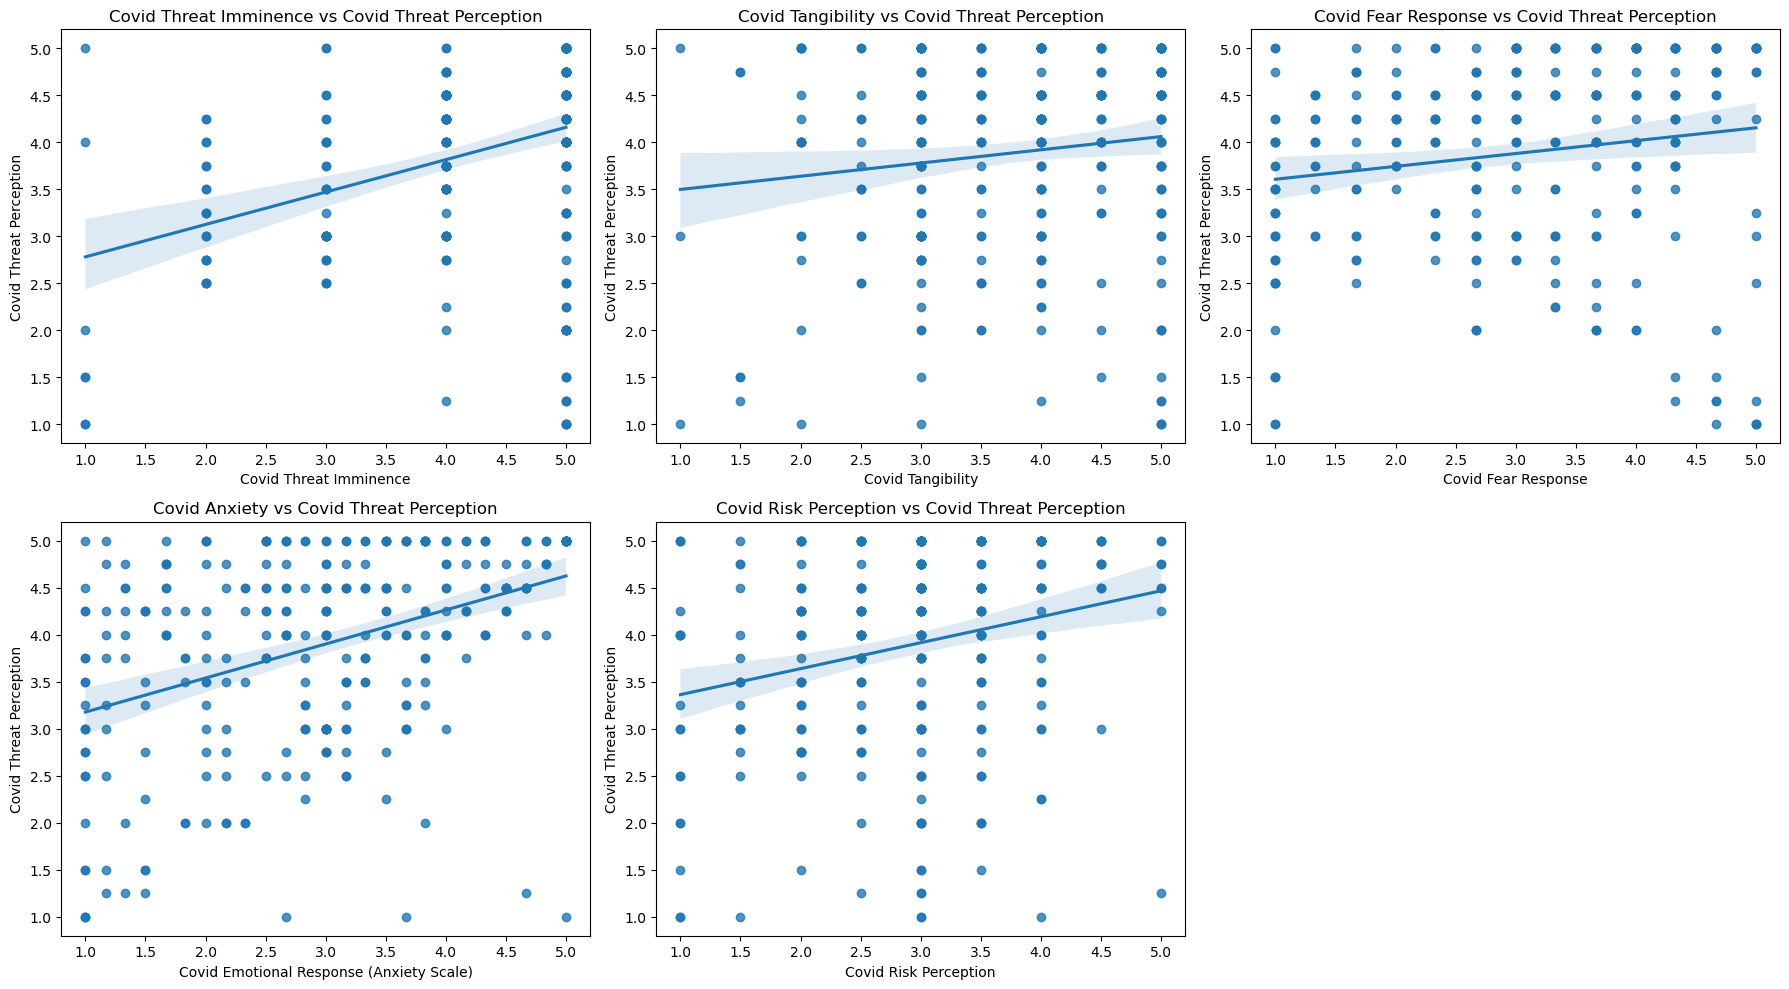

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                OLS Regression Results                              
 Dep. Variable:     Covid Threat Perception   R-squared:                       0.123
 Model:                                 OLS   Adj. R-squared:                  0.120
 Method:                      Least Squares   F-statistic:                     42.07
 Date:                     Wed, 12 Feb 2025   Prob (F-statistic):           3.62e-10
 Time:                             14:59:01   Log-Likelihood:                -416.23
 No. Observations:                      302   AIC:                             836.5
 Df Residuals:                          300   BIC:                             843.9
 Df Model:                                1                                         
 Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
 -------

In [34]:
# Import necessary libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting relevant columns for regression
X1 = df_final_covid[['Covid Threat Imminence']]
X2 = df_final_covid[['Covid Tangibility']]
X3 = df_final_covid[['Covid Fear Response']]
X4 = df_final_covid[['Covid Emotional Response (Anxiety Scale)']]
X5 = df_final_covid[['Covid Risk Perception']]
Y = df_final_covid['Covid Threat Perception']

# Adding constant for OLS regression
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)
X4 = sm.add_constant(X4)
X5 = sm.add_constant(X5)

# Performing OLS regression
model1 = sm.OLS(Y, X1).fit()
model2 = sm.OLS(Y, X2).fit()
model3 = sm.OLS(Y, X3).fit()
model4 = sm.OLS(Y, X4).fit()
model5 = sm.OLS(Y, X5).fit()

# Displaying regression summaries
summary1 = model1.summary()
summary2 = model2.summary()
summary3 = model3.summary()
summary4 = model4.summary()
summary5 = model5.summary()

# Adjusting the plot layout to a grid with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Regression plot for Covid Threat Imminence vs Covid Threat Perception
sns.regplot(x=df_final_covid['Covid Threat Imminence'], y=df_final_covid['Covid Threat Perception'], ax=axes[0, 0])
axes[0, 0].set_title('Covid Threat Imminence vs Covid Threat Perception')

# Regression plot for Covid Tangibility vs Covid Threat Perception
sns.regplot(x=df_final_covid['Covid Tangibility'], y=df_final_covid['Covid Threat Perception'], ax=axes[0, 1])
axes[0, 1].set_title('Covid Tangibility vs Covid Threat Perception')

# Regression plot for Covid Fear Response vs Covid Threat Perception
sns.regplot(x=df_final_covid['Covid Fear Response'], y=df_final_covid['Covid Threat Perception'], ax=axes[0, 2])
axes[0, 2].set_title('Covid Fear Response vs Covid Threat Perception')

# Regression plot for Covid Anxiety vs Covid Threat Perception
sns.regplot(x=df_final_covid['Covid Emotional Response (Anxiety Scale)'], y=df_final_covid['Covid Threat Perception'], ax=axes[1, 0])
axes[1, 0].set_title('Covid Anxiety vs Covid Threat Perception')

# Regression plot for Covid Risk Perception vs Covid Threat Perception
sns.regplot(x=df_final_covid['Covid Risk Perception'], y=df_final_covid['Covid Threat Perception'], ax=axes[1, 1])
axes[1, 1].set_title('Covid Risk Perception vs Covid Threat Perception')

# Remove the last empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Returning regression summaries
summary1, summary2, summary3, summary4, summary5


### Multiple Regression on Threat Perception (DV), Threat Iminence, Tangbility, Fear response, emotional response, covid risk perception

In [36]:
# Import necessary libraries
import pandas as pd
from statsmodels.formula.api import ols

# Running multiple regression including all five predictors
model_multi_covid = ols(
    "Q('Covid Threat Perception') ~ Q('Covid Threat Imminence') + Q('Covid Tangibility') + "
    "Q('Covid Fear Response') + Q('Covid Emotional Response (Anxiety Scale)') + Q('Covid Risk Perception')",
    data=df_final_covid
).fit()

# Display regression summary
multi_summary_covid = model_multi_covid.summary()
multi_summary_covid


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q('Covid Threat Perception')   R-squared:                       0.277
Model:                                      OLS   Adj. R-squared:                  0.265
Method:                           Least Squares   F-statistic:                     22.67
Date:                          Wed, 12 Feb 2025   Prob (F-statistic):           2.99e-19
Time:                                  14:59:02   Log-Likelihood:                -387.10
No. Observations:                           302   AIC:                             786.2
Df Residuals:                               296   BIC:                             808.5
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         1.8587      0.271      6.850      0.000       1.325       2.393
Q('Covid Threat Imminence')                       0.2756      0.061      4.545      0.000       0.156       0.395
Q('Covid Tangibility')                            0.0373      0.055      0.677      0.499      -0.071       0.146
Q('Covid Fear Response')                         -0.3180      0.062     -5.128      0.000      -0.440      -0.196
Q('Covid Emotional Response (Anxiety Scale)')     0.4471      0.061      7.374      0.000       0.328       0.566
Q('Covid Risk Perception')                        0.1289      0.060      2.166      0.031       0.012       0.246
==============================================================================
Omnibus:                       37.272   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.608
Skew:                          -0.819   Prob(JB):                     6.21e-12
Kurtosis:                       4.192   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Fear Response, Anxiety, and Risk Perception remain significant

- These predictors still have direct effects, meaning they might have both direct and (probably) indirect pathways.
- Partial mediation is possible → Fear/Anxiety/Risk may influence Threat Perception both directly and through Imminence.

### Sobel Test for Mediation

In [39]:
# Import necessary libraries
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

# Define the predictors, mediator, and dependent variable
factors = {
    "Covid Tangibility": df_final_covid["Covid Tangibility"],
    "Covid Fear Response": df_final_covid["Covid Fear Response"],
    "Covid Emotional Response (Anxiety Scale)": df_final_covid["Covid Emotional Response (Anxiety Scale)"],
    "Covid Risk Perception": df_final_covid["Covid Risk Perception"],
}

M = df_final_covid["Covid Threat Imminence"]  # Mediator
Y = df_final_covid["Covid Threat Perception"]  # Dependent Variable

# Function to perform Sobel Test for mediation analysis
def sobel_test(X, M, Y):
    # Step 1: Regression of Mediator (M) on Independent Variable (X)
    X_mediator = sm.add_constant(X)
    model_mediator = sm.OLS(M, X_mediator).fit()
    a_coef = model_mediator.params[1]  # Effect of X on M
    a_se = model_mediator.bse[1]  # Standard error of a

    # Step 2: Regression of Dependent Variable (Y) on Mediator (M) and Independent Variable (X)
    X_Y = sm.add_constant(pd.concat([X, M], axis=1))
    model_Y = sm.OLS(Y, X_Y).fit()
    b_coef = model_Y.params[2]  # Effect of M on Y (controlling for X)
    b_se = model_Y.bse[2]  # Standard error of b

    # Step 3: Sobel Test Calculation
    sobel_stat = (a_coef * b_coef) / np.sqrt((b_coef**2 * a_se**2) + (a_coef**2 * b_se**2))
    p_value = 2 * (1 - norm.cdf(abs(sobel_stat)))  # Two-tailed test

    # Return Sobel test result
    return {
        "Sobel Test Statistic": sobel_stat,
        "P-value": p_value,
        "a (X -> M)": a_coef,
        "b (M -> Y)": b_coef,
        "a SE": a_se,
        "b SE": b_se
    }

# Run the Sobel Test for each factor
sobel_results = {factor: sobel_test(X, M, Y) for factor, X in factors.items()}

# Display all results
sobel_results


{'Covid Tangibility': {'Sobel Test Statistic': 4.085912903022194,
  'P-value': 4.390384679764381e-05,
  'a (X -> M)': 0.3279956367288165,
  'b (M -> Y)': 0.33567271146419797,
  'a SE': 0.05888574538232132,
  'b SE': 0.05583432114625192},
 'Covid Fear Response': {'Sobel Test Statistic': 5.113359441294846,
  'P-value': 3.16479268347436e-07,
  'a (X -> M)': 0.4617198891990044,
  'b (M -> Y)': 0.3635894953111175,
  'a SE': 0.04221093020723946,
  'b SE': 0.06285820324031277},
 'Covid Emotional Response (Anxiety Scale)': {'Sobel Test Statistic': 3.4073345898038765,
  'P-value': 0.000656006565890932,
  'a (X -> M)': 0.3926480698596222,
  'b (M -> Y)': 0.20997701126035415,
  'a SE': 0.04697578709566656,
  'b SE': 0.056272203073995004},
 'Covid Risk Perception': {'Sobel Test Statistic': 4.075509300641659,
  'P-value': 4.591374704721041e-05,
  'a (X -> M)': 0.39613677483176446,
  'b (M -> Y)': 0.2957453660964423,
  'a SE': 0.061574136401368995,
  'b SE': 0.05614878584487521}}

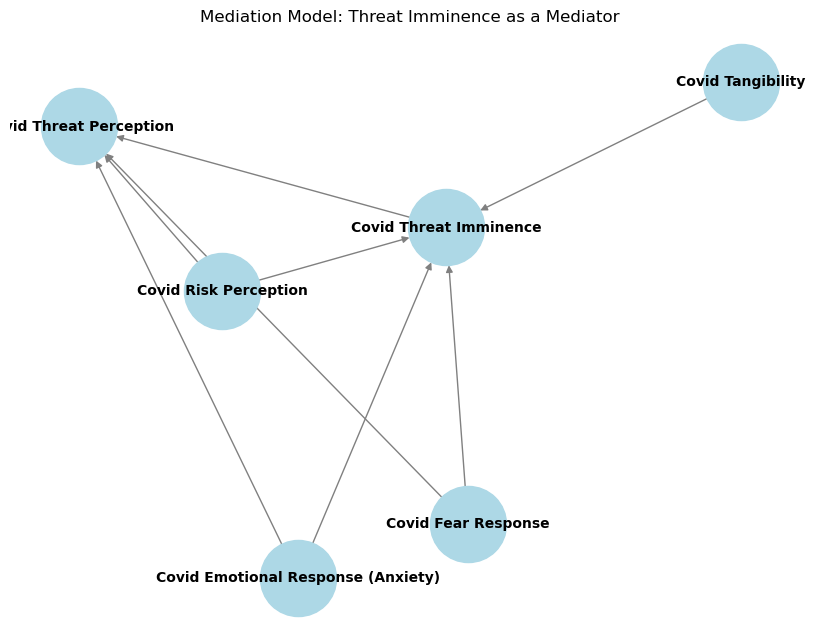

In [40]:

# Create a directed graph for the mediation model
G = nx.DiGraph()

# Add nodes (variables)
nodes = [
    "Covid Tangibility", "Covid Fear Response", "Covid Emotional Response (Anxiety)",
    "Covid Risk Perception", "Covid Threat Imminence", "Covid Threat Perception"
]
G.add_nodes_from(nodes)

# Add edges (mediation pathways through Threat Imminence)
edges = [
    ("Covid Tangibility", "Covid Threat Imminence"),
    ("Covid Fear Response", "Covid Threat Imminence"),
    ("Covid Emotional Response (Anxiety)", "Covid Threat Imminence"),
    ("Covid Risk Perception", "Covid Threat Imminence"),
    ("Covid Threat Imminence", "Covid Threat Perception"),

    # Direct effects that remained significant in multiple regression
    ("Covid Fear Response", "Covid Threat Perception"),
    ("Covid Emotional Response (Anxiety)", "Covid Threat Perception"),
    ("Covid Risk Perception", "Covid Threat Perception")
]

G.add_edges_from(edges)

# Draw the mediation model
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Positioning nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10, font_weight="bold", arrows=True)
plt.title("Mediation Model: Threat Imminence as a Mediator")
plt.show()


## Threat Imminence, Tangibility, and Threat Preception on Climate Change

In [42]:
'The following questions regard Climate Change. \nTo what extent do you agree or disagree that we have plenty of time to deal with Climate Change?',
'To what extent do you agree or disagree that Climate Change is an imminent threat?',
'Fill in the following sentence: When I think of Climate Change, it is _____ for me to imagine it.',
'When I think of Climate Change it is a very concrete concept.',
'Please rate the following items related to Climate Change. - I believe our climate is changing.',
'Please rate the following items related to Climate Change. - I am concerned about global climate change.',
'Please rate the following items related to Climate Change. - I believe there is evidence of global climate change.',
'Please rate the following items related to Climate Change. - Global climate change will impact our environment in the next 10 years.',
'Please rate the following items related to Climate Change. - Global climate change will impact future generations.',
'Please rate the following items related to Climate Change. - The actions of individuals can make a difference in global climate change.',
'Please rate the following items related to Climate Change. - Human activities cause global climate change.',
'Please rate the following items related to Climate Change. - Climate change has a negative effect on our lives.',
'Please rate the following items related to Climate Change. - We cannot do anything to stop global climate change.',
'Please rate the following items related to Climate Change. - I can do my part to make the world a better place for future generations.',
'How much do you agree or disagree with the following statements? - Climate Change is a threat to me',
'How much do you agree or disagree with the following statements? - Climate Change is a threat to my loved ones',
'How much do you agree or disagree with the following statements? - Climate Change is a threat to the economy',
'How much do you agree or disagree with the following statements? - Climate Change is a threat to society',
'On a scale of 1-5, how much do you fear COVID-19 today? 1 being none at all, 5 being extreme fear. - Fear of COVID-19',
'On a scale of 1-5, how much do you fear Climate Change today? 1 being none at all, 5 being extreme fear. - Fear of Climate Change',


('On a scale of 1-5, how much do you fear Climate Change today? 1 being none at all, 5 being extreme fear. - Fear of Climate Change',)

In [43]:
# Define category groupings for Climate Change using the correct column names
climate_category_columns = {
    "Climate Threat Imminence": [
        # "The following questions regard Climate Change. \nTo what extent do you agree or disagree that we have plenty of time to deal with Climate Change?",
        "To what extent do you agree or disagree that Climate Change is an imminent threat?"
    ],
    "Climate Tangibility": [
        "Fill in the following sentence: When I think of Climate Change, it is _____ for me to imagine it.",
        "When I think of Climate Change it is a very concrete concept."
    ],
    "Climate Threat Perception": [
        "How much do you agree or disagree with the following statements? - Climate Change is a threat to me",
        "How much do you agree or disagree with the following statements? - Climate Change is a threat to my loved ones",
        "How much do you agree or disagree with the following statements? - Climate Change is a threat to the economy",
        "How much do you agree or disagree with the following statements? - Climate Change is a threat to society"
    ],
    "Climate Emotional Response (Anxiety Scale)": [
       'Please rate the following items related to Climate Change. - I believe our climate is changing.',
       'Please rate the following items related to Climate Change. - I am concerned about global climate change.',
       'Please rate the following items related to Climate Change. - I believe there is evidence of global climate change.',
       'Please rate the following items related to Climate Change. - Global climate change will impact our environment in the next 10 years.',
    ],
    "Climate Fear Response": [
        "On a scale of 1-5, how much do you fear Climate Change today? 1 being none at all, 5 being extreme fear. - Fear of Climate Change"
    ],
    "Climate Risk Perception": [
        "Please rate the following items related to Climate Change. - Human activities cause global climate change.",
        "Please rate the following items related to Climate Change. - The actions of individuals can make a difference in global climate change."
    ],
    # "Climate Personal Experience": [
    #     "Please rate the following items related to Climate Change. - I believe there is evidence of global climate change."
    # ]
}

# Copy the dataset to avoid modifying the original
df_categories_climate = df.copy()

# Ensure correct column names and compute mean scores per category
climate_processed_categories = {}
for category, columns in climate_category_columns.items():
    # Validate columns exist in dataset
    climate_valid_columns = [col for col in columns if col in df.columns]
    
    if climate_valid_columns:
        df_categories_climate[category] = round(df[climate_valid_columns].mean(axis=1), 2)
        climate_processed_categories[category] = climate_valid_columns  # Track processed columns

# Select only ID and computed category scores
df_final_climate = df_categories_climate[["ID"] + list(climate_processed_categories.keys())]

df_final_climate

,ID,Climate Threat Imminence,Climate Tangibility,Climate Threat Perception,Climate Emotional Response (Anxiety Scale),Climate Fear Response,Climate Risk Perception
0,1,5.0,5.0,4.00,4.00,4.0,4.0
1,2,4.0,3.0,2.50,4.00,1.0,4.0
2,3,1.0,2.5,1.00,2.50,1.0,3.0
3,4,4.0,4.0,4.00,5.00,3.0,5.0
4,5,4.0,3.0,3.50,4.75,1.0,5.0
...,...,...,...,...,...,...,...
297,298,3.0,4.5,3.00,4.00,2.0,4.0
298,299,4.0,4.5,4.00,4.50,2.0,5.0
299,300,4.0,3.5,4.25,4.00,1.0,4.5
300,301,2.0,5.0,1.00,2.75,1.0,2.5


### Simple Regression Analysis 

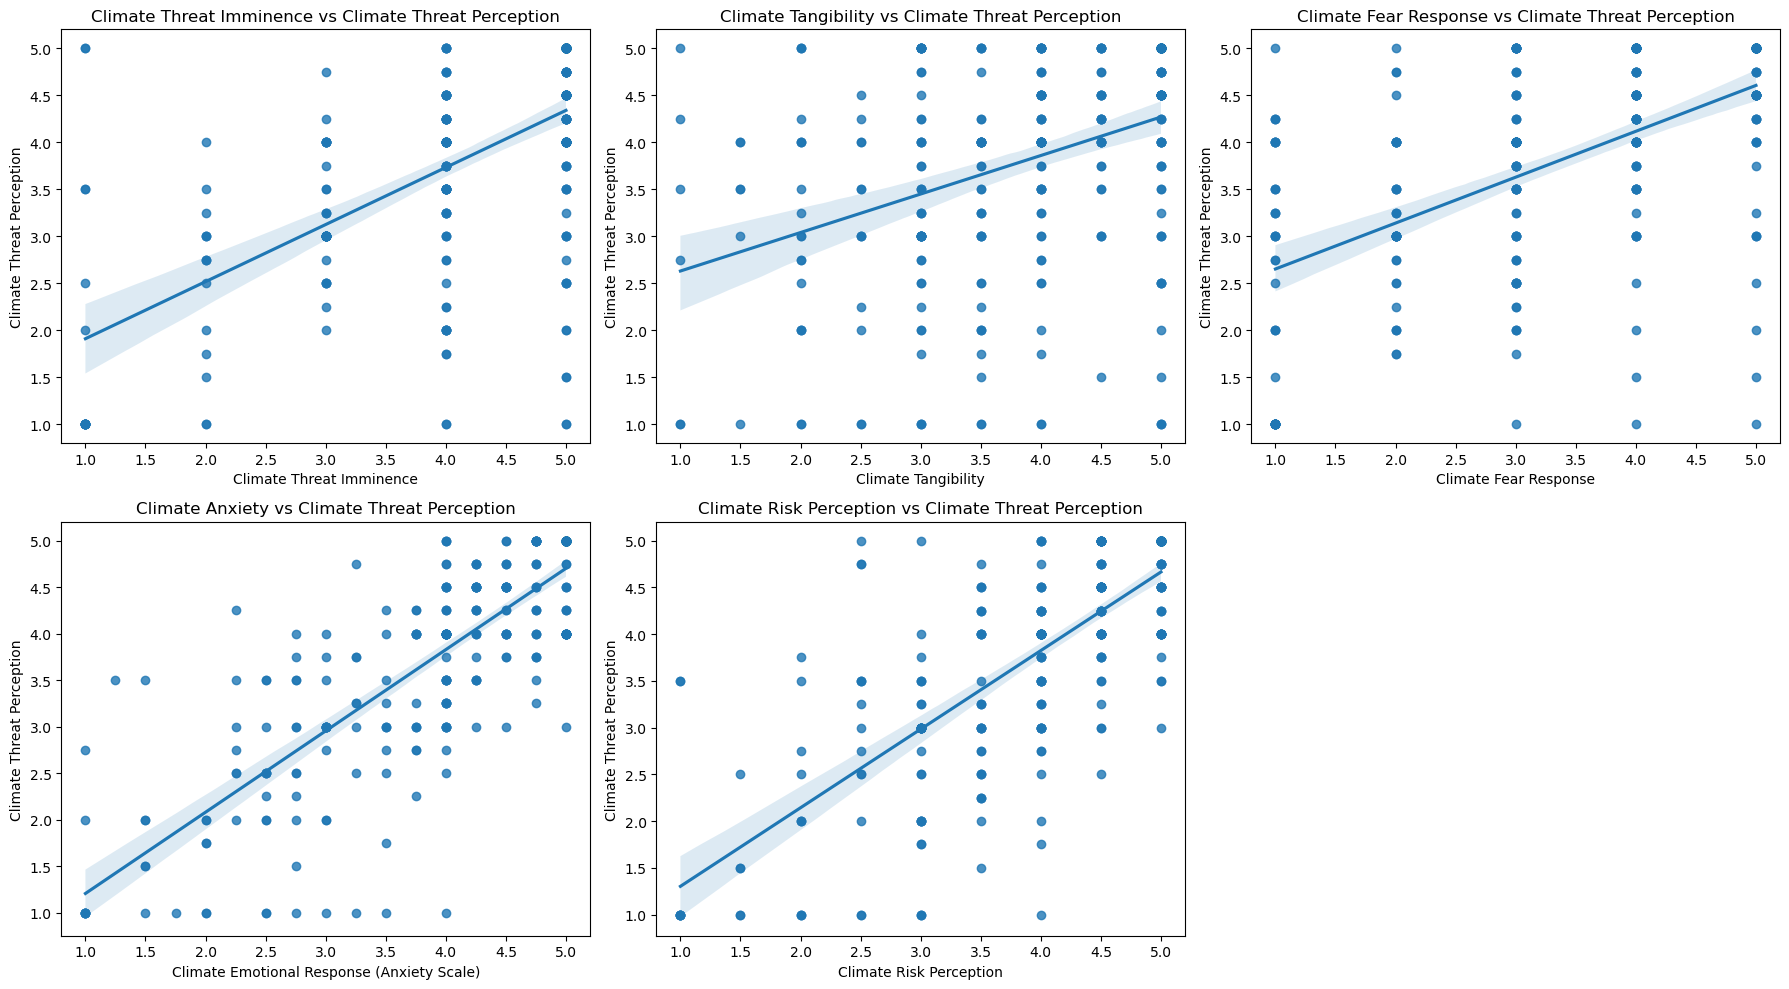

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                 OLS Regression Results                               
 Dep. Variable:     Climate Threat Perception   R-squared:                       0.377
 Model:                                   OLS   Adj. R-squared:                  0.375
 Method:                        Least Squares   F-statistic:                     181.6
 Date:                       Wed, 12 Feb 2025   Prob (F-statistic):           1.09e-32
 Time:                               14:59:02   Log-Likelihood:                -394.96
 No. Observations:                        302   AIC:                             793.9
 Df Residuals:                            300   BIC:                             801.3
 Df Model:                                  1                                         
 Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.02

In [45]:
# Extracting relevant columns for regression
X1 = df_final_climate[['Climate Threat Imminence']]
X2 = df_final_climate[['Climate Tangibility']]
X3 = df_final_climate[['Climate Fear Response']]
X4 = df_final_climate[['Climate Emotional Response (Anxiety Scale)']]
X5 = df_final_climate[['Climate Risk Perception']]
Y = df_final_climate['Climate Threat Perception']

# Adding constant for OLS regression
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)
X4 = sm.add_constant(X4)
X5 = sm.add_constant(X5)

# Performing OLS regression
model1 = sm.OLS(Y, X1).fit()
model2 = sm.OLS(Y, X2).fit()
model3 = sm.OLS(Y, X3).fit()
model4 = sm.OLS(Y, X4).fit()
model5 = sm.OLS(Y, X5).fit()

# Displaying regression summaries
summary1 = model1.summary()
summary2 = model2.summary()
summary3 = model3.summary()
summary4 = model4.summary()
summary5 = model5.summary()

# Adjusting the plot layout to a grid with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Regression plot for Covid Threat Imminence vs Covid Threat Perception
sns.regplot(x=df_final_climate['Climate Threat Imminence'], y=df_final_climate['Climate Threat Perception'], ax=axes[0, 0])
axes[0, 0].set_title('Climate Threat Imminence vs Climate Threat Perception')

# Regression plot for Covid Tangibility vs Covid Threat Perception
sns.regplot(x=df_final_climate['Climate Tangibility'], y=df_final_climate['Climate Threat Perception'], ax=axes[0, 1])
axes[0, 1].set_title('Climate Tangibility vs Climate Threat Perception')

# Regression plot for Covid Fear Response vs Covid Threat Perception
sns.regplot(x=df_final_climate['Climate Fear Response'], y=df_final_climate['Climate Threat Perception'], ax=axes[0, 2])
axes[0, 2].set_title('Climate Fear Response vs Climate Threat Perception')

# Regression plot for Covid Anxiety vs Covid Threat Perception
sns.regplot(x=df_final_climate['Climate Emotional Response (Anxiety Scale)'], y=df_final_climate['Climate Threat Perception'], ax=axes[1, 0])
axes[1, 0].set_title('Climate Anxiety vs Climate Threat Perception')

# Regression plot for Covid Risk Perception vs Covid Threat Perception
sns.regplot(x=df_final_climate['Climate Risk Perception'], y=df_final_climate['Climate Threat Perception'], ax=axes[1, 1])
axes[1, 1].set_title('Climate Risk Perception vs Climate Threat Perception')

# Remove the last empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Returning regression summaries
summary1, summary2, summary3, summary4, summary5


### Multiple Regression Analysis

In [47]:
# Running multiple regression including all five predictors
model_multi_climate = ols(
    "Q('Climate Threat Perception') ~ Q('Climate Threat Imminence') + Q('Climate Tangibility') + "
    "Q('Climate Fear Response') + Q('Climate Emotional Response (Anxiety Scale)') + Q('Climate Risk Perception')",
    data=df_final_climate
).fit()

# Display regression summary
model_multi_climate = model_multi_climate.summary()
model_multi_climate

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Q('Climate Threat Perception')   R-squared:                       0.740
Model:                                        OLS   Adj. R-squared:                  0.735
Method:                             Least Squares   F-statistic:                     168.1
Date:                            Wed, 12 Feb 2025   Prob (F-statistic):           2.89e-84
Time:                                    14:59:03   Log-Likelihood:                -263.26
No. Observations:                             302   AIC:                             538.5
Df Residuals:                                 296   BIC:                             560.8
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          -0.1304      0.159     -0.820      0.413      -0.443       0.182
Q('Climate Threat Imminence')                       0.1281      0.042      3.028      0.003       0.045       0.211
Q('Climate Tangibility')                           -0.0658      0.039     -1.705      0.089      -0.142       0.010
Q('Climate Fear Response')                          0.1785      0.034      5.287      0.000       0.112       0.245
Q('Climate Emotional Response (Anxiety Scale)')     0.5414      0.059      9.238      0.000       0.426       0.657
Q('Climate Risk Perception')                        0.2303      0.061      3.805      0.000       0.111       0.349
==============================================================================
Omnibus:                       19.192   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.977
Skew:                          -0.219   Prob(JB):                     2.32e-11
Kurtosis:                       4.924   Cond. No.                         42.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sobel Test fo Mediation

In [49]:
# Define the predictors, mediator, and dependent variable
factors = {
    "Climate Tangibility": df_final_climate["Climate Tangibility"],
    "Climate Fear Response": df_final_climate["Climate Fear Response"],
    "Climate Emotional Response (Anxiety Scale)": df_final_climate["Climate Emotional Response (Anxiety Scale)"],
    "Climate Risk Perception": df_final_climate["Climate Risk Perception"],
}

M = df_final_climate["Climate Threat Imminence"]  # Mediator
Y = df_final_climate["Climate Threat Perception"]  # Dependent Variable

# Function to perform Sobel Test for mediation analysis
def sobel_test(X, M, Y):
    # Step 1: Regression of Mediator (M) on Independent Variable (X)
    X_mediator = sm.add_constant(X)
    model_mediator = sm.OLS(M, X_mediator).fit()
    a_coef = model_mediator.params[1]  # Effect of X on M
    a_se = model_mediator.bse[1]  # Standard error of a

    # Step 2: Regression of Dependent Variable (Y) on Mediator (M) and Independent Variable (X)
    X_Y = sm.add_constant(pd.concat([X, M], axis=1))
    model_Y = sm.OLS(Y, X_Y).fit()
    b_coef = model_Y.params[2]  # Effect of M on Y (controlling for X)
    b_se = model_Y.bse[2]  # Standard error of b

    # Step 3: Sobel Test Calculation
    sobel_stat = (a_coef * b_coef) / np.sqrt((b_coef**2 * a_se**2) + (a_coef**2 * b_se**2))
    p_value = 2 * (1 - norm.cdf(abs(sobel_stat)))  # Two-tailed test

    # Return Sobel test result
    return {
        "Sobel Test Statistic": sobel_stat,
        "P-value": p_value,
        "a (X -> M)": a_coef,
        "b (M -> Y)": b_coef,
        "a SE": a_se,
        "b SE": b_se
    }

# Run the Sobel Test for each factor
sobel_results = {factor: sobel_test(X, M, Y) for factor, X in factors.items()}

# Display all results
sobel_results


{'Climate Tangibility': {'Sobel Test Statistic': 7.479938096730587,
  'P-value': 7.438494264988549e-14,
  'a (X -> M)': 0.5600450582819076,
  'b (M -> Y)': 0.5618132760515872,
  'a SE': 0.05360160750805345,
  'b SE': 0.052441497752349485},
 'Climate Fear Response': {'Sobel Test Statistic': 6.740291885989785,
  'P-value': 1.580691133540313e-11,
  'a (X -> M)': 0.539626183740844,
  'b (M -> Y)': 0.4247844627077982,
  'a SE': 0.03979884353375554,
  'b SE': 0.05468296808453746},
 'Climate Emotional Response (Anxiety Scale)': {'Sobel Test Statistic': 5.534651360834824,
  'P-value': 3.118480296215864e-08,
  'a (X -> M)': 0.5961818400516481,
  'b (M -> Y)': 0.23604993289873932,
  'a SE': 0.05237738756306469,
  'b SE': 0.03726805958954431},
 'Climate Risk Perception': {'Sobel Test Statistic': 5.897986280412474,
  'P-value': 3.6796456992505e-09,
  'a (X -> M)': 0.6093981461886824,
  'b (M -> Y)': 0.2874900969684757,
  'a SE': 0.054727719253591815,
  'b SE': 0.0413444816651955}}

## Moderation

### Political Affiliation (Democrat vs. Republican)

In [52]:
## Political Affiliation

df_poli = df['Generally speaking, do you usually think of yourself as a Republican, a Democrat, an Independent, or something else? - Selected Choice']
df_poli.unique()
# Count frequency of each income group
poli_counts =df_poli.value_counts().sort_index()
# df_poli['Democrat']

In [53]:
poli = df[['ID','Generally speaking, do you usually think of yourself as a Republican, a Democrat, an Independent, or something else? - Selected Choice']]

poli = poli.rename(columns={'Generally speaking, do you usually think of yourself as a Republican, a Democrat, an Independent, or something else? - Selected Choice': 'Political Affiliation'})
merged_covid_poli = poli.merge(df_final_covid, on='ID', how='inner')
merged_climate_poli = poli.merge(df_final_climate, on='ID', how='inner')


In [55]:
import statsmodels.formula.api as smf

# Filter dataset to include only Democrats and Republicans
merged_covid_poli_filtered = merged_covid_poli[
    merged_covid_poli['Political Affiliation'].isin(['Democrat', 'Republican'])
].copy()  # Copy to avoid SettingWithCopyWarning

# Create a binary variable for Political Affiliation (1 = Republican, 0 = Democrat)
merged_covid_poli_filtered['Political Binary'] = merged_covid_poli_filtered['Political Affiliation'].apply(
    lambda x: 1 if x == 'Republican' else 0
)

# Creating interaction terms for moderation analysis
merged_covid_poli_filtered['Imminence * Political'] = (
    merged_covid_poli_filtered['Covid Threat Imminence'] * merged_covid_poli_filtered['Political Binary']
)
merged_covid_poli_filtered['Tangibility * Political'] = (
    merged_covid_poli_filtered['Covid Tangibility'] * merged_covid_poli_filtered['Political Binary']
)

# Run moderation analysis
mod_model = smf.ols(
    "Q('Covid Threat Perception') ~ Q('Covid Threat Imminence') + "
    "Q('Political Binary') + Q('Imminence * Political') + Q('Tangibility * Political')",
    data=merged_covid_poli_filtered
).fit()

print(mod_model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Q('Covid Threat Perception')   R-squared:                       0.124
Model:                                      OLS   Adj. R-squared:                  0.109
Method:                           Least Squares   F-statistic:                     8.000
Date:                          Wed, 12 Feb 2025   Prob (F-statistic):           4.77e-06
Time:                                  15:00:24   Log-Likelihood:                -318.77
No. Observations:                           231   AIC:                             647.5
Df Residuals:                               226   BIC:                             664.7
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [57]:
!jupyter nbconvert --to html --TemplateExporter.exclude_input=True 'threat imminence coding book.ipynb' > nul 2>&1